<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Belambus_Selatan/Belambus_Selatan_LIM_Lim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_belambus_selatan"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [3]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_belambus_selatan
Rows: 855
Columns: 16
Shape: (855, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
0.3773632049560547

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,855.0,5.922185,3.674509,0.000000,3.000000,6.000000,8.675000,17.000000
To,855.0,6.635050,3.670369,0.300000,3.740000,6.400000,9.000000,18.000000
Interval,855.0,0.712865,0.294277,0.120000,0.450000,0.700000,1.000000,1.500000
CoreRec,855.0,0.991234,0.124041,0.260000,1.000000,1.000000,1.000000,3.100000
WetW,855.0,3.850371,1.839270,0.400000,2.295000,3.820000,5.206500,10.265000
H2O,855.0,23.257950,15.081707,0.639000,10.320500,22.187000,34.205500,65.541000
DryW,855.0,3.015953,1.621328,0.245000,1.620000,2.910000,4.309000,8.515000
WTF,855.0,1.869734,0.466007,0.722426,1.581269,1.811992,2.092399,4.652560
DTF,855.0,1.436012,0.438915,0.318491,1.131333,1.440388,1.737027,3.169096



Unique GEN_LYR count: 7
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,461
BRK,163
SAP,134
SAPX,46
SAPB,31
LIMX,12
LIMB,8



Unique Material count: 25
Top Material value counts:


,count
Material,
YLIM,189
Lim,128
ESAP,85
RLIM,80
Sap,49
BR,44
SAP,40
SPT,36
HGT,35



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [114]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: LIM
Masukkan Material yang ingin difilter: Lim

Filtered rows: 113


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
334,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.0,7.595,13.627,6.560,Lim,None,LIM,LIM,2.589290,2.236438
335,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.00,2.00,1.00,0.8,5.420,13.100,4.710,Lim,None,LIM,LIM,2.309735,2.007169
336,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,3.00,1.00,1.0,6.245,10.568,5.585,Lim,None,LIM,LIM,2.129048,1.904040
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.70,0.70,1.0,3.510,3.989,3.370,Lim,None,LIM,LIM,1.709472,1.641288
338,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.70,4.35,0.65,0.8,2.440,20.902,1.930,Lim,None,LIM,LIM,1.599703,1.265339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.00,2.00,1.00,1.0,8.985,22.538,6.960,Lim,None,LIM,LIM,3.063169,2.372806
811,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,3.00,1.00,1.0,5.465,34.126,3.600,Lim,None,SAP,LIM,1.863130,1.227313
812,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.64,0.64,1.0,3.975,37.987,2.465,Lim,None,LIM,LIM,2.117435,1.313076
813,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.64,4.00,0.36,1.0,2.220,43.468,1.255,Lim,None,LIM,LIM,2.102342,1.188486


# Filter By Interval

Descriptive statistics for Interval:
Count: 113
Mean: 0.734248
Standard Error: 0.027257
Median: 0.74
Mode: 1.0
Standard Deviation: 0.289744
Sample Variance: 0.083951
Kurtosis: -1.411909
Skewness: -0.309271
Range: 1.1
Minimum: 0.15
Maximum: 1.25
Sum: 82.97
Confidence Level (95%): ±0.054006

Bin calculation:
Freedman–Diaconis -> bins: 5, bin width: 0.231664
Sturges -> bins: 8, bin width: 0.137500


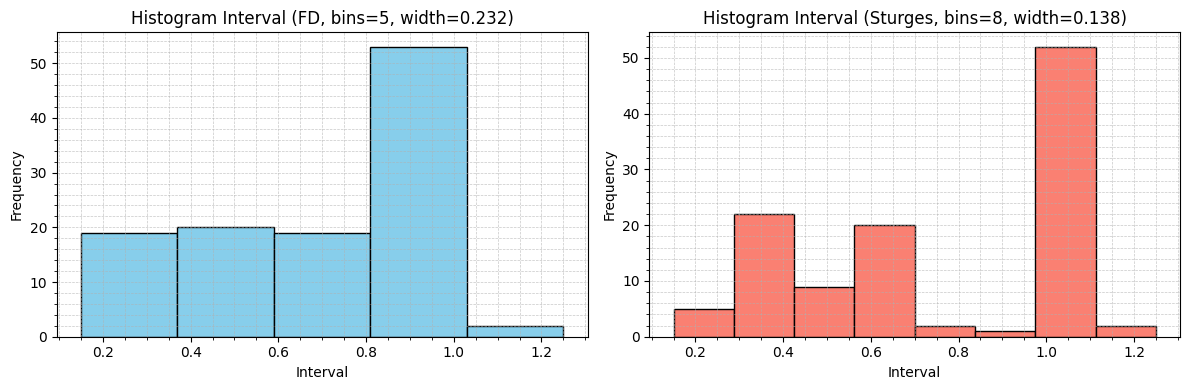


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.15,0.37,19
1,0.37,0.59,20
2,0.59,0.81,19
3,0.81,1.03,53
4,1.03,1.25,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.1500,0.2875,5
1,0.2875,0.4250,22
2,0.4250,0.5625,9
3,0.5625,0.7000,20
4,0.7000,0.8375,2
5,0.8375,0.9750,1
6,0.9750,1.1125,52
7,1.1125,1.2500,2


In [115]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd # Added import for pandas
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins: {bins_fd}, bin width: {h_fd:.6f}")
    print(f"Sturges -> bins: {bins_st}, bin width: {h_st:.6f}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram Interval (FD, bins={bins_fd}, width={h_fd:.3f})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={h_st:.3f})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [116]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.2875
Masukkan batas atas (is less than or equal to): 1.1125

Filtered rows: 106


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
334,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.00,7.595,13.627,6.560,Lim,None,LIM,LIM,2.589290,2.236438
335,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.00,2.00,1.00,0.80,5.420,13.100,4.710,Lim,None,LIM,LIM,2.309735,2.007169
336,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,3.00,1.00,1.00,6.245,10.568,5.585,Lim,None,LIM,LIM,2.129048,1.904040
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.70,0.70,1.00,3.510,3.989,3.370,Lim,None,LIM,LIM,1.709472,1.641288
338,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.70,4.35,0.65,0.80,2.440,20.902,1.930,Lim,None,LIM,LIM,1.599703,1.265339
339,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.35,5.00,0.65,0.77,2.090,38.038,1.295,Lim,None,LIM,LIM,1.423623,0.882102
340,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,5.00,6.00,1.00,0.90,4.140,44.444,2.300,Lim,None,LIM,LIM,1.568234,0.871241
341,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,7.00,1.00,1.00,4.885,47.492,2.565,Lim,None,LIM,LIM,1.665396,0.874461
342,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.58,0.58,1.00,3.115,45.746,1.690,Lim,None,LIM,LIM,1.830977,0.993371
343,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.58,8.00,0.42,1.00,2.685,45.251,1.470,Lim,None,LIM,LIM,2.179455,1.193221


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 106
Mean: 0.970849
Standard Error: 0.006162
Median: 1.0
Mode: 1.0
Standard Deviation: 0.063443
Sample Variance: 0.004025
Kurtosis: 2.250989
Skewness: -1.948897
Range: 0.22999999999999998
Minimum: 0.77
Maximum: 1.0
Sum: 102.91
Confidence Level (95%): ±0.012218

Bin calculation:
Freedman–Diaconis -> bins=10, width=N/A
Sturges -> bins=8, width=0.028750


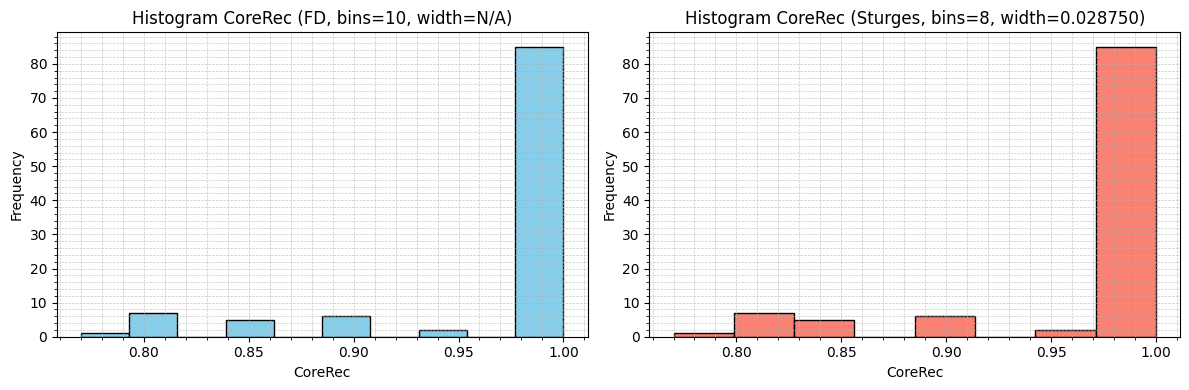


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.770,0.793,1
1,0.793,0.816,7
2,0.816,0.839,0
3,0.839,0.862,5
4,0.862,0.885,0
5,0.885,0.908,6
6,0.908,0.931,0
7,0.931,0.954,2
8,0.954,0.977,0
9,0.977,1.000,85



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.77000,0.79875,1
1,0.79875,0.82750,7
2,0.82750,0.85625,5
3,0.85625,0.88500,0
4,0.88500,0.91375,6
5,0.91375,0.94250,0
6,0.94250,0.97125,2
7,0.97125,1.00000,85


In [117]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram CoreRec (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [118]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.97125
Masukkan batas atas (is less than or equal to): 1.00000

Filtered rows: 85


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
334,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.0,7.595,13.627,6.560,Lim,None,LIM,LIM,2.589290,2.236438
336,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,3.00,1.00,1.0,6.245,10.568,5.585,Lim,None,LIM,LIM,2.129048,1.904040
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.70,0.70,1.0,3.510,3.989,3.370,Lim,None,LIM,LIM,1.709472,1.641288
341,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,7.00,1.00,1.0,4.885,47.492,2.565,Lim,None,LIM,LIM,1.665396,0.874461
342,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.58,0.58,1.0,3.115,45.746,1.690,Lim,None,LIM,LIM,1.830977,0.993371
343,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.58,8.00,0.42,1.0,2.685,45.251,1.470,Lim,None,LIM,LIM,2.179455,1.193221
344,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.70,0.70,1.0,4.085,34.761,2.665,Lim,None,LIM,LIM,1.989514,1.297932
346,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.56,10.00,0.44,1.0,2.190,46.119,1.180,Lim,None,LIM,LIM,1.696854,0.914286
347,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.00,10.70,0.70,1.0,3.580,47.486,1.880,Lim,None,LIM,LIM,1.743564,0.915615
353,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.0,5.450,14.679,4.650,Lim,None,LIM,LIM,1.858016,1.585280


# Filter By Wet Weight


Residual IQR acuan:
Q1: -0.831, Q3: 0.298, IQR: 1.129
Lower margin: -2.524, Upper margin: 1.991


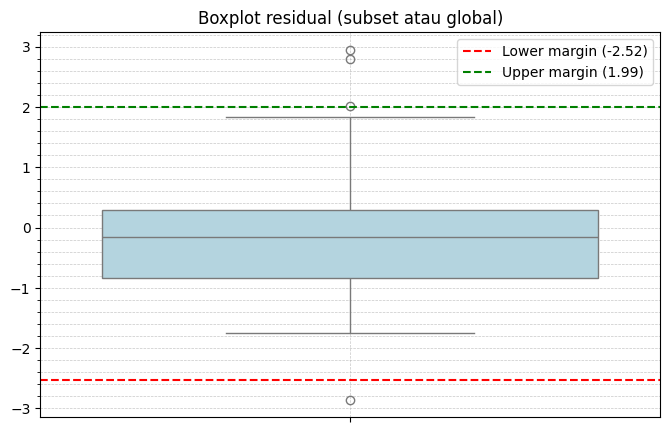

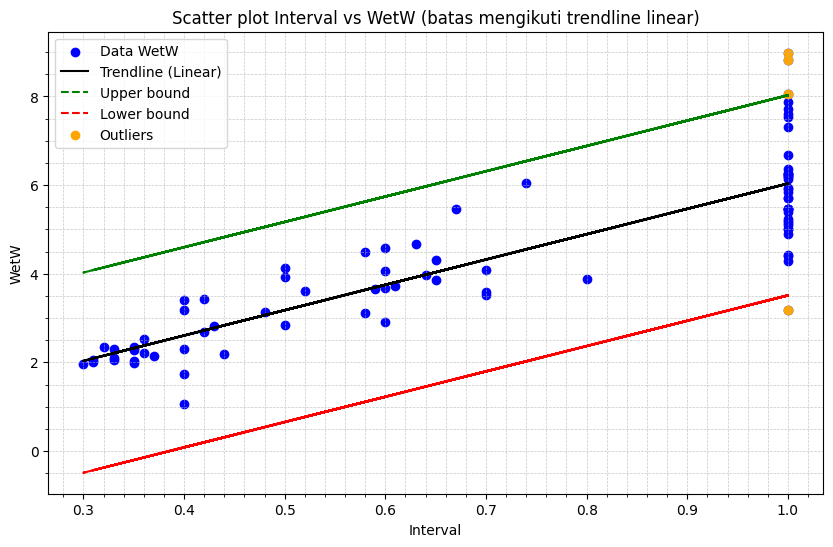


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
        HoleId                       Hill        Hill_Group  From    To  \
393  CS8230819  Belambus Blok 1 Spasi 100  Belambus_Selatan   4.0   5.0   
394  CS8230819  Belambus Blok 1 Spasi 100  Belambus_Selatan   5.0   6.0   
535  CS8230833  Belambus Blok 1 Spasi 100  Belambus_Selatan  10.0  11.0   
810  CS8230897  Belambus Blok 1 Spasi 100  Belambus_Selatan   1.0   2.0   

     Interval  CoreRec   WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR  \
393       1.0      1.0  8.825  32.408  5.965      Lim  None     LIM     LIM   
394       1.0      1.0  8.045  34.431  5.275      Lim  None     LIM     LIM   
535       1.0      1.0  3.180  34.434  2.085      Lim  None     LIM     LIM   
810       1.0      1.0  8.985  22.538  6.960      Lim  None     LIM     LIM   

          WTF       DTF  
393  3.008622  2.033590  
394  2.742704  1.798355  
535  1.084127  0.710819  
810  3.063169  2.372806  


In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [120]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-2539338653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
334,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.0,7.595,13.627,6.560,Lim,None,LIM,LIM,2.589290,2.236438,7.595
336,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,3.00,1.00,1.0,6.245,10.568,5.585,Lim,None,LIM,LIM,2.129048,1.904040,6.245
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.70,0.70,1.0,3.510,3.989,3.370,Lim,None,LIM,LIM,1.709472,1.641288,3.510
341,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,7.00,1.00,1.0,4.885,47.492,2.565,Lim,None,LIM,LIM,1.665396,0.874461,4.885
342,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.58,0.58,1.0,3.115,45.746,1.690,Lim,None,LIM,LIM,1.830977,0.993371,3.115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.0,6.265,22.107,4.880,Lim,None,SAP,LIM,2.135866,1.663691,6.265
810,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.00,2.00,1.00,1.0,8.985,22.538,6.960,Lim,None,LIM,LIM,3.063169,2.372806,8.985
811,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,3.00,1.00,1.0,5.465,34.126,3.600,Lim,None,SAP,LIM,1.863130,1.227313,5.465
812,CS8230897,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.64,0.64,1.0,3.975,37.987,2.465,Lim,None,LIM,LIM,2.117435,1.313076,3.975



Residual IQR acuan:
Q1: -0.831, Q3: 0.298, IQR: 1.129
Lower margin: -2.524, Upper margin: 1.991


/tmp/ipython-input-1675437817.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1675437817.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


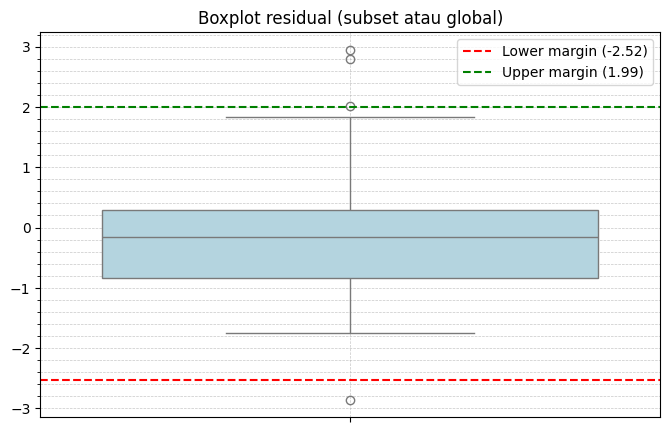

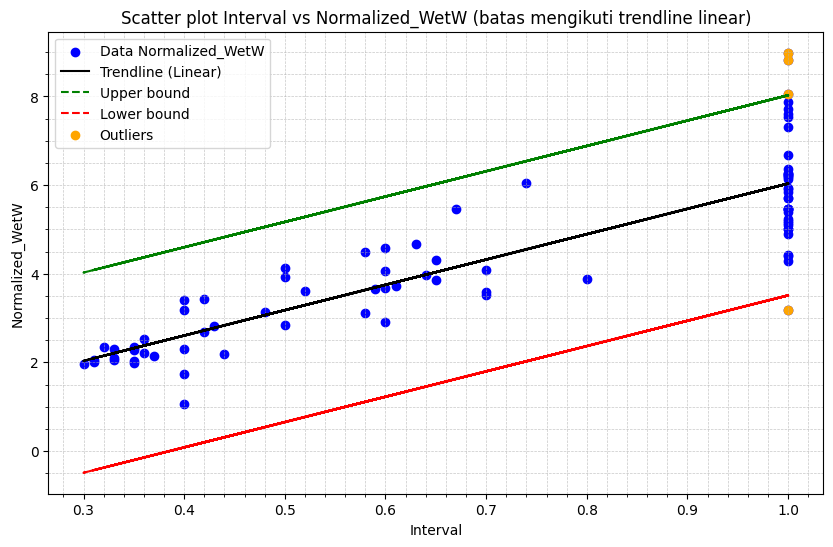

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
334,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.0,7.595,13.627,6.560,Lim,None,LIM,LIM,2.589290,2.236438,7.595,6.034333,Normal
336,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,3.00,1.00,1.0,6.245,10.568,5.585,Lim,None,LIM,LIM,2.129048,1.904040,6.245,6.034333,Normal
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.70,0.70,1.0,3.510,3.989,3.370,Lim,None,LIM,LIM,1.709472,1.641288,3.510,4.320318,Normal
341,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,7.00,1.00,1.0,4.885,47.492,2.565,Lim,None,LIM,LIM,1.665396,0.874461,4.885,6.034333,Normal
342,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.58,0.58,1.0,3.115,45.746,1.690,Lim,None,LIM,LIM,1.830977,0.993371,3.115,3.634711,Normal
343,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.58,8.00,0.42,1.0,2.685,45.251,1.470,Lim,None,LIM,LIM,2.179455,1.193221,2.685,2.720570,Normal
344,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.70,0.70,1.0,4.085,34.761,2.665,Lim,None,LIM,LIM,1.989514,1.297932,4.085,4.320318,Normal
346,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.56,10.00,0.44,1.0,2.190,46.119,1.180,Lim,None,LIM,LIM,1.696854,0.914286,2.190,2.834838,Normal
347,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.00,10.70,0.70,1.0,3.580,47.486,1.880,Lim,None,LIM,LIM,1.743564,0.915615,3.580,4.320318,Normal
353,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.0,5.450,14.679,4.650,Lim,None,LIM,LIM,1.858016,1.585280,5.450,6.034333,Normal


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=7, width=1.298663
Sturges -> bins=8, width=0.990625


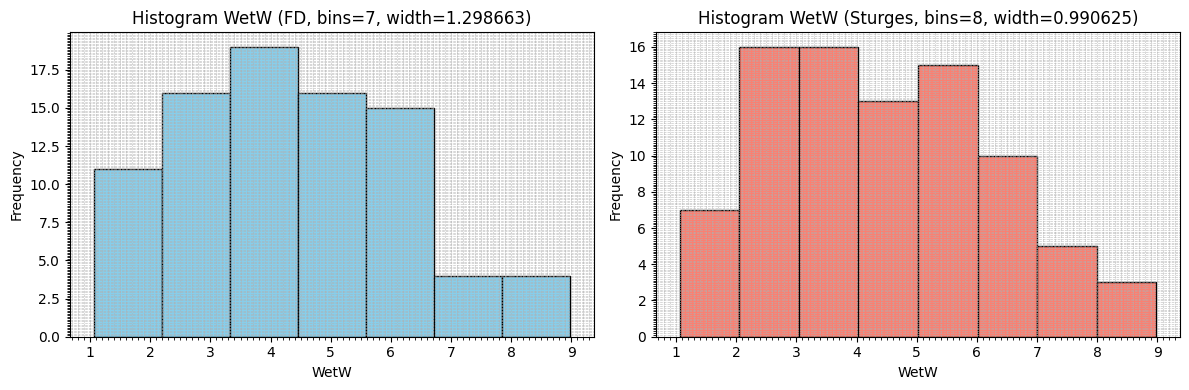


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,1.060000,2.192143,11
1,2.192143,3.324286,16
2,3.324286,4.456429,19
3,4.456429,5.588571,16
4,5.588571,6.720714,15
5,6.720714,7.852857,4
6,7.852857,8.985000,4



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,1.060000,2.050625,7
1,2.050625,3.041250,16
2,3.041250,4.031875,16
3,4.031875,5.022500,13
4,5.022500,6.013125,15
5,6.013125,7.003750,10
6,7.003750,7.994375,5
7,7.994375,8.985000,3


In [122]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [123]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 2.050625
Masukkan batas atas (<=): 7.003750

Filtered rows (Normal only): 69


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
336,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,3.00,1.00,1.0,6.245,10.568,5.585,Lim,None,LIM,LIM,2.129048,1.904040,6.245,6.034333
337,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.70,0.70,1.0,3.510,3.989,3.370,Lim,None,LIM,LIM,1.709472,1.641288,3.510,4.320318
341,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,7.00,1.00,1.0,4.885,47.492,2.565,Lim,None,LIM,LIM,1.665396,0.874461,4.885,6.034333
342,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.58,0.58,1.0,3.115,45.746,1.690,Lim,None,LIM,LIM,1.830977,0.993371,3.115,3.634711
343,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.58,8.00,0.42,1.0,2.685,45.251,1.470,Lim,None,LIM,LIM,2.179455,1.193221,2.685,2.720570
344,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.70,0.70,1.0,4.085,34.761,2.665,Lim,None,LIM,LIM,1.989514,1.297932,4.085,4.320318
346,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.56,10.00,0.44,1.0,2.190,46.119,1.180,Lim,None,LIM,LIM,1.696854,0.914286,2.190,2.834838
347,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.00,10.70,0.70,1.0,3.580,47.486,1.880,Lim,None,LIM,LIM,1.743564,0.915615,3.580,4.320318
353,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.00,1.00,1.00,1.0,5.450,14.679,4.650,Lim,None,LIM,LIM,1.858016,1.585280,5.450,6.034333
354,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.00,2.00,1.00,1.0,6.215,13.757,5.360,Lim,None,LIM,LIM,2.118820,1.827333,6.215,6.034333


#Filter By MC


Descriptive statistics for H2O:
Count: 69
Mean: 27.691246
Standard Error: 1.419949
Median: 27.971
Mode: 3.989
Standard Deviation: 11.794982
Sample Variance: 139.121594
Kurtosis: -0.893678
Skewness: -0.075969
Range: 47.775000000000006
Minimum: 3.989
Maximum: 51.764
Sum: 1910.6960000000001
Confidence Level (95%): ±2.833464

Bin calculation:
Freedman–Diaconis -> bins=5, width=9.863550
Sturges -> bins=8, width=5.971875


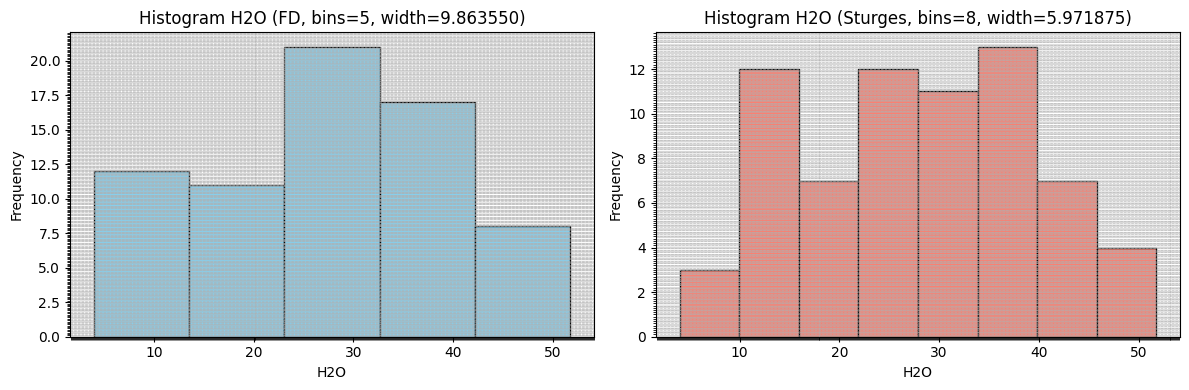


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,3.989,13.544,12
1,13.544,23.099,11
2,23.099,32.654,21
3,32.654,42.209,17
4,42.209,51.764,8



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,3.989000,9.960875,3
1,9.960875,15.932750,12
2,15.932750,21.904625,7
3,21.904625,27.876500,12
4,27.876500,33.848375,11
5,33.848375,39.820250,13
6,39.820250,45.792125,7
7,45.792125,51.764000,4


In [124]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [125]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 15.932750
is less than or equal to: 45.792125

Filtered rows (H2O): 50


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
342,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,7.58,0.58,1.0,3.115,45.746,1.690,Lim,None,LIM,LIM,1.830977,0.993371,3.115,3.634711
343,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.58,8.00,0.42,1.0,2.685,45.251,1.470,Lim,None,LIM,LIM,2.179455,1.193221,2.685,2.720570
344,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.70,0.70,1.0,4.085,34.761,2.665,Lim,None,LIM,LIM,1.989514,1.297932,4.085,4.320318
361,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,7.00,1.00,1.0,6.185,27.971,4.455,Lim,None,LIM,LIM,2.108592,1.518800,6.185,6.034333
362,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,8.00,1.00,1.0,6.675,30.787,4.620,Lim,None,LIM,LIM,2.275643,1.575052,6.675,6.034333
363,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,9.00,1.00,1.0,5.190,38.728,3.180,Lim,None,LIM,LIM,1.769377,1.084127,5.190,6.034333
391,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.35,3.00,0.65,1.0,4.310,25.986,3.190,Lim,None,LIM,LIM,2.260564,1.673132,4.310,4.034648
395,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.33,0.33,1.0,2.295,34.641,1.500,Lim,None,LIM,LIM,2.370946,1.549638,2.295,2.206365
396,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.33,7.00,0.67,1.0,5.470,35.832,3.510,Lim,None,LIM,LIM,2.783335,1.786016,5.470,4.148916
397,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,8.00,1.00,1.0,5.390,38.219,3.330,Lim,None,LIM,LIM,1.837561,1.135265,5.390,6.034333


# Filter By DTF


Descriptive statistics for DTF:
Count: 50
Mean: 1.515003
Standard Error: 0.036768
Median: 1.528452978
Mode: 0.993371375
Standard Deviation: 0.259990
Sample Variance: 0.067595
Kurtosis: -0.663024
Skewness: 0.090356
Range: 1.1005245799999999
Minimum: 0.993371375
Maximum: 2.093895955
Sum: 75.750126402
Confidence Level (95%): ±0.073888

Bin calculation:
Freedman–Diaconis -> bins=6, width=0.199672
Sturges -> bins=7, width=0.157218


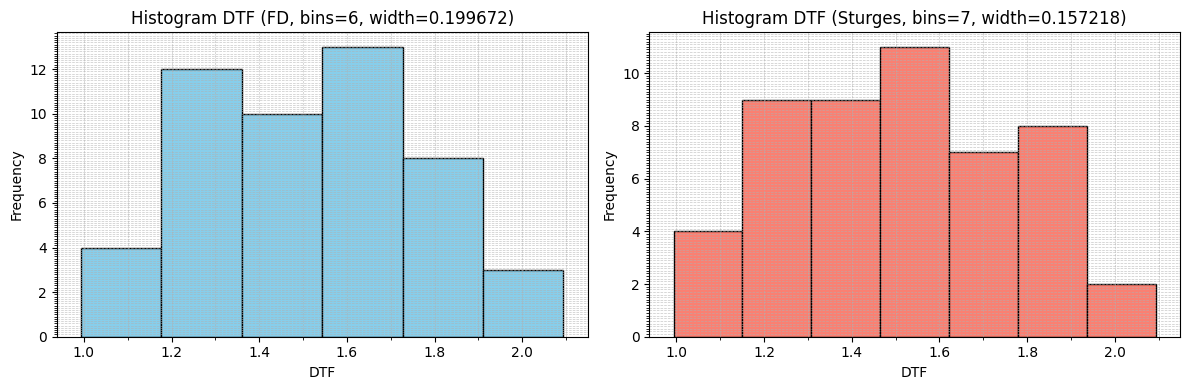


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.993371,1.176792,4
1,1.176792,1.360213,12
2,1.360213,1.543634,10
3,1.543634,1.727054,13
4,1.727054,1.910475,8
5,1.910475,2.093896,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.993371,1.150589,4
1,1.150589,1.307807,9
2,1.307807,1.465025,9
3,1.465025,1.622243,11
4,1.622243,1.779460,7
5,1.779460,1.936678,8
6,1.936678,2.093896,2


In [126]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [130]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(89))

is greater than or equal to: 1.150589
is less than or equal to: 1.936678

Filtered rows (DTF): 44


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
343,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.58,8.00,0.42,1.0,2.685,45.251,1.470,Lim,None,LIM,LIM,2.179455,1.193221,2.685,2.720570
344,CS8230816R,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,8.70,0.70,1.0,4.085,34.761,2.665,Lim,None,LIM,LIM,1.989514,1.297932,4.085,4.320318
361,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,7.00,1.00,1.0,6.185,27.971,4.455,Lim,None,LIM,LIM,2.108592,1.518800,6.185,6.034333
362,CS8230817,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.00,8.00,1.00,1.0,6.675,30.787,4.620,Lim,None,LIM,LIM,2.275643,1.575052,6.675,6.034333
391,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.35,3.00,0.65,1.0,4.310,25.986,3.190,Lim,None,LIM,LIM,2.260564,1.673132,4.310,4.034648
395,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.00,6.33,0.33,1.0,2.295,34.641,1.500,Lim,None,LIM,LIM,2.370946,1.549638,2.295,2.206365
396,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.33,7.00,0.67,1.0,5.470,35.832,3.510,Lim,None,LIM,LIM,2.783335,1.786016,5.470,4.148916
398,CS8230819,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.00,9.00,1.00,1.0,5.700,39.123,3.470,Lim,None,LIM,LIM,1.943246,1.182994,5.700,6.034333
427,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.00,2.50,0.50,1.0,2.845,16.872,2.365,Lim,None,LIM,LIM,1.939837,1.612553,2.845,3.177641
429,CS8230824,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.80,0.80,1.0,3.875,23.742,2.955,Lim,None,LIM,LIM,1.651333,1.259275,3.875,4.891656


# SUMMARY

In [128]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 44
Mean: 0.634091
Standard Error: 0.038214
Median: 0.6
Mode: 1.0
Standard Deviation: 0.253481
Sample Variance: 0.064253
Kurtosis: -1.285133
Skewness: 0.428243
Range: 0.69
Minimum: 0.31
Maximum: 1.0
Sum: 27.9
Confidence Level (95%): ±0.077065

Descriptive statistics for CoreRec:
Count: 44
Mean: 1.000000
Standard Error: 0.000000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.000000
Sample Variance: 0.000000
Kurtosis: N/A
Skewness: N/A
Range: 0.0
Minimum: 1.0
Maximum: 1.0
Sum: 44.0
Confidence Level (95%): ±0.000000

Descriptive statistics for WetW:
Count: 44
Mean: 4.013864
Standard Error: 0.215272
Median: 3.895
Mode: 5.7
Standard Deviation: 1.427955
Sample Variance: 2.039057
Kurtosis: -1.160935
Skewness: 0.293023
Range: 4.615
Minimum: 2.06
Maximum: 6.675
Sum: 176.60999999999999
Confidence Level (95%): ±0.434138

Descriptive statistics for H2O:
Count: 44
Mean: 30.363818
Standard Error: 1.118664
Median: 28.732999999999997
Mode: 16.872
Standard Devia

/tmp/ipython-input-1308544473.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(data) if n > 3 else np.nan
/tmp/ipython-input-1308544473.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(data) if n > 2 else np.nan


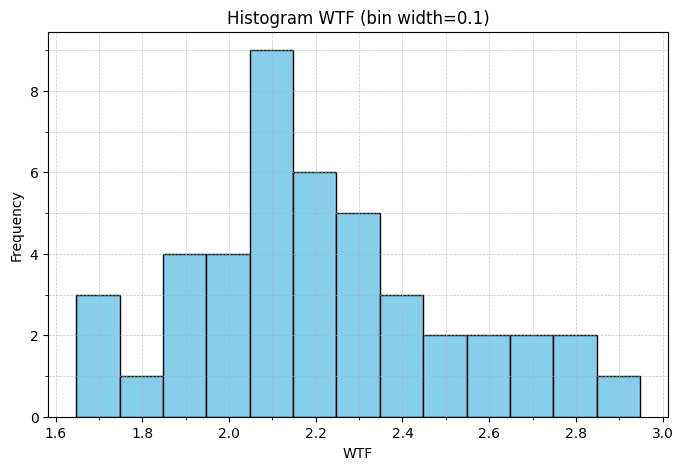


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.647782,1.747782,3
1,1.747782,1.847782,1
2,1.847782,1.947782,4
3,1.947782,2.047782,4
4,2.047782,2.147782,9
5,2.147782,2.247782,6
6,2.247782,2.347782,5
7,2.347782,2.447782,3
8,2.447782,2.547782,2
9,2.547782,2.647782,2


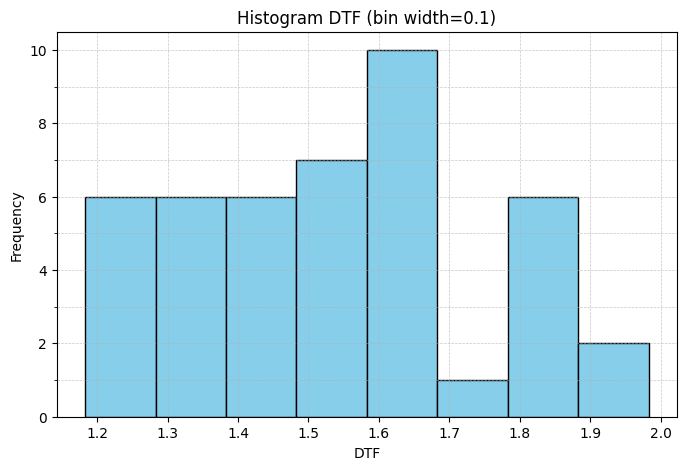


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,1.182994,1.282994,6
1,1.282994,1.382994,6
2,1.382994,1.482994,6
3,1.482994,1.582994,7
4,1.582994,1.682994,10
5,1.682994,1.782994,1
6,1.782994,1.882994,6
7,1.882994,1.982994,2


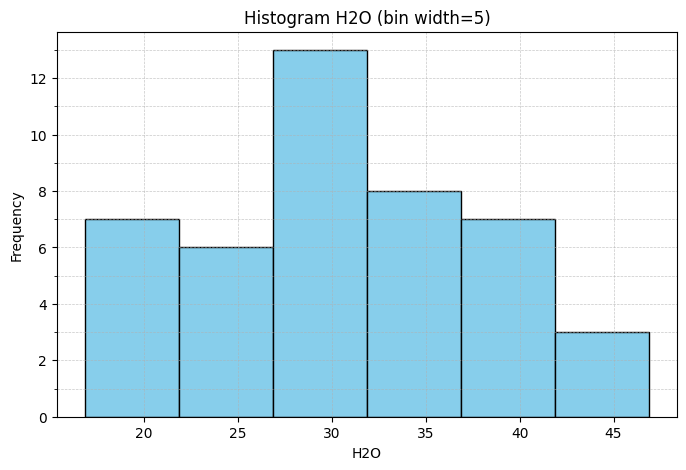


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,16.872,21.872,7
1,21.872,26.872,6
2,26.872,31.872,13
3,31.872,36.872,8
4,36.872,41.872,7
5,41.872,46.872,3


In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [131]:
Limport pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Belambus Selatan
Masukkan GEN_LYR: LIM
Masukkan Material: Lim

Tabel Ringkasan tersimpan sebagai variabel: df_belambus_selatan_lim_lim


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,LIM,Lim,0.634091,1.0,4.013864,30.363818,2.812159,2.209966,1.530636
